## Data cleaning

• Remove: capital letters, punctuation, numbers, stop words

• Stemming 

• Correct misspellings

• Parts of speech tagging

• Chunking (named entity recognition, compound term extraction)

In [19]:
# Necessary imports
from datasets import load_dataset  # In the case of 'Unfair clauses' the data is retrieved using the datasets library
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Retrieving data using load_dataset function
data = load_dataset("laugustyniak/abusive-clauses-pl")

## Data overview

In [4]:
print(data)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 4284
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3453
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1519
    })
})


The data is divided into sets: train, test and validation.

In [5]:
# Transforming data to Pandas DataFrame
df_train = data['train'].to_pandas()
df_test = data['test'].to_pandas()
df_validation = data['validation'].to_pandas()

In [6]:
df_train.head(10)

,text,label
0,Wszelka korespondencja wysyłana przez Pożyczko...,0
1,W przypadku opóźnień Pożyczkobiorcy w spłacie ...,0
2,W przypadku opóźnień Pożyczkobiorcy w spłacie ...,0
3,Pożyczkobiorca zleca firmie Narodowy Fundusz P...,0
4,Od niespłaconej w terminie raty Pożyczkobiorca...,0
5,Pożyczkobiorca ma prawo wybrać inny sposób prz...,0
6,W przypadku braku spłaty pożyczki w terminie P...,0
7,Zabezpieczeniem spłaty pożyczki będzie podpisa...,0
8,Termin zwrotu pożyczki strony ustalają na 01 w...,0
9,"Okres trwania pożyczki wynosi 1 miesiąc, przy ...",0


In the 'text' column there is text of agreement. In the 'label' (output) column there are two possible values: 0 in the case of abusive clause\, and 1 in the case of correct agreement statement

In [7]:
# Checking if there are any null values in the 'text' column of the train, test, or validation
print(df_train['text'].isnull().any() or df_test['text'].isnull().any() or df_validation['text'].isnull().any())

False


In [8]:
# Percentage of abusive clauses and correct agreement statements
print(round(df_train['label'].value_counts()/len(df_train['label']) * 100, 2))

label
1    54.58
0    45.42
Name: count, dtype: float64


In [20]:
# Calculating the length of each agreement
df_train['text_length'] = df_train['text'].apply(len)

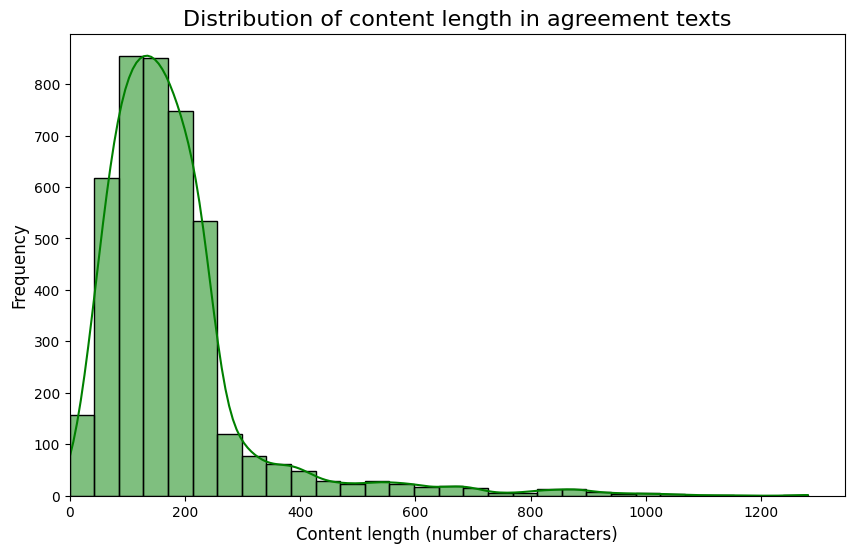

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['text_length'], kde=True, bins=30, color='green')
plt.title('Distribution of content length in agreement texts', fontsize=16)
plt.xlabel('Content length (number of characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(left=0)
plt.show()

From the chart it can be concluded that most of the content of the agreements does not exceed 200 characters.

## 2. Data preprocessing

short description

In [10]:
df_train['text'].iloc[9]

'Okres trwania pożyczki wynosi 1 miesiąc, przy czym może zostać przedłużana co miesiąc do 24 miesięcy'

In [13]:
# Removing numbers from the text using regex pattern
pattern = r'\b\w*\d\w*\b'
df_train['text'] = df_train['text'].str.replace(pattern, '', regex=True).str.strip()
df_train['text'].iloc[9]

'Okres trwania pożyczki wynosi  miesiąc, przy czym może zostać przedłużana co miesiąc do  miesięcy'

In [15]:
# Removing capital letters from the content
df_train['text'] = df_train['text'].str.lower()
df_train['text'].iloc[9]

'okres trwania pożyczki wynosi  miesiąc, przy czym może zostać przedłużana co miesiąc do  miesięcy'

In [16]:
# Removing punctuation marks from the content
df_train['text'] = df_train['text'].str.replace(r'[^\w\s]','',regex=True)
df_train['text'].iloc[9]

'okres trwania pożyczki wynosi  miesiąc przy czym może zostać przedłużana co miesiąc do  miesięcy'